In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mnist_reader
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report

# 2.2 Classifiers

In [2]:
# load the fashion mnist dataset
X_train, Y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, Y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
# normalize the data in 0-1
X_train = minmax_scale(X_train)
X_test = minmax_scale(X_test)

## 2.2.1 Artificial neural networks

In [4]:
ANN_clf = MLPClassifier(hidden_layer_sizes=64,
                        activation='relu',
                        solver='sgd',
                        alpha=0,
                        learning_rate_init=0.001,
                        max_iter=200,
                        early_stopping=True,
                        shuffle=True)

In [5]:
# ANN_clf.fit(X_train, Y_train)
# ANN_clf.score(X_train, Y_train)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        ANN_clf,
        X_train[:30000],
        Y_train[:30000],
        scoring=None,
        cv=None,
        n_jobs=None,
        return_times=True)

In [6]:
train_scores_mean_MLP = np.mean(train_scores, axis=1)
train_scores_std_MLP = np.std(train_scores, axis=1)
test_scores_mean_MLP = np.mean(test_scores, axis=1)
test_scores_std_MLP = np.std(test_scores, axis=1)
fit_times_mean_MLP = np.mean(fit_times, axis=1)
fit_times_std_MLP = np.std(fit_times, axis=1)

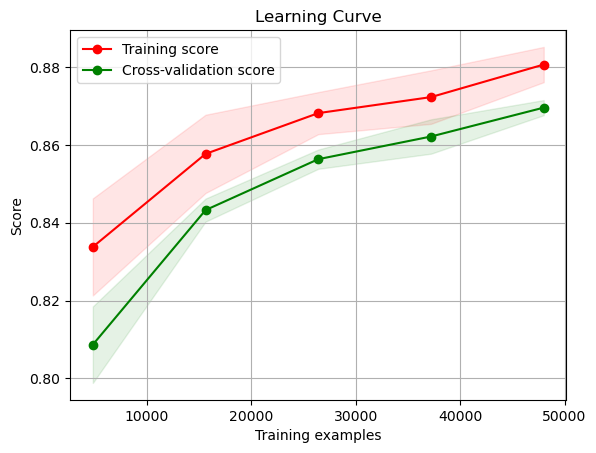

In [13]:
# plt.plot(ANN_clf.validation_scores_)
# plt.title('Learning Curve')
# plt.xlabel('Iteration')
# plt.ylabel('Score')
# plt.show()

# plot learning curve
plt.grid()
plt.fill_between(
        train_sizes,
        train_scores_mean_MLP - train_scores_std_MLP,
        train_scores_mean_MLP + train_scores_std_MLP,
        alpha=0.1,
        color="r")
plt.fill_between(
        train_sizes,
        test_scores_mean_MLP - test_scores_std_MLP,
        test_scores_mean_MLP + test_scores_std_MLP,
        alpha=0.1,
        color="g",)
plt.plot(train_sizes, train_scores_mean_MLP, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean_MLP, "o-", color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.show()

Text(0.5, 1.0, 'Scalability of the model')

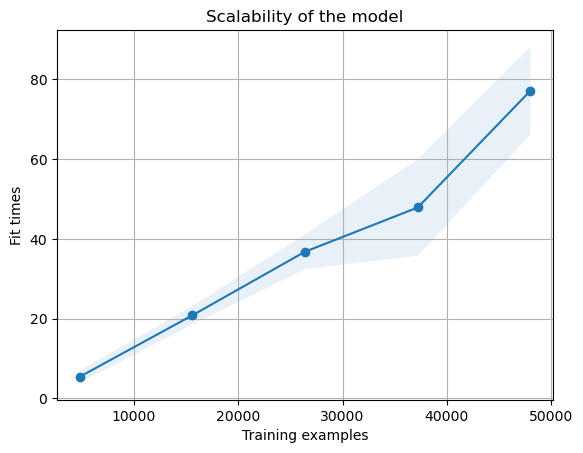

In [14]:
# plt.plot(ANN_clf.loss_curve_)
# plt.title('Loss Curve')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.show()

# Plot n_samples vs fit_times
plt.grid()
plt.plot(train_sizes, fit_times_mean_MLP, "o-")
plt.fill_between(
        train_sizes,
        fit_times_mean_MLP - fit_times_std_MLP,
        fit_times_mean_MLP + fit_times_std_MLP,
        alpha=0.1,
    )
plt.xlabel("Training examples")
plt.ylabel("Fit times")
plt.title("Scalability of the model")

Text(0.5, 1.0, 'Performance of the model')

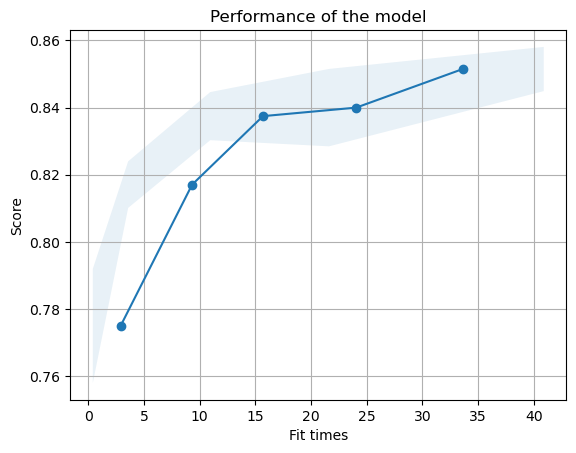

In [10]:
# Plot fit_time vs score
fit_time_argsort_MLP = fit_times_mean_MLP.argsort()
fit_time_sorted_MLP = fit_times_mean_MLP[fit_time_argsort]
test_scores_mean_sorted_MLP = test_scores_mean_MLP[fit_time_argsort]
test_scores_std_sorted_MLP = test_scores_std_MLP[fit_time_argsort]
plt.grid()
plt.plot(fit_time_sorted_MLP, test_scores_mean_sorted_MLP, "o-")
plt.fill_between(
        fit_time_sorted,
        test_scores_mean_sorted_MLP - test_scores_std_sorted_MLP,
        test_scores_mean_sorted_MLP + test_scores_std_sorted_MLP,
        alpha=0.1)
plt.xlabel("Fit times")
plt.ylabel("Score")
plt.title("Performance of the model")

Training accuracy:  0.88
Testing accuracy:  0.86


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


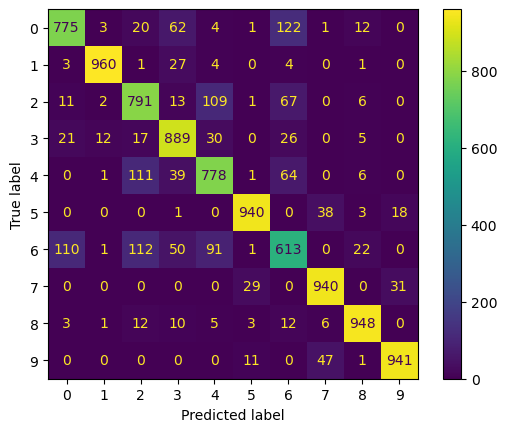

In [10]:
# result in testing dataset
ANN_clf.fit(X_train, Y_train)
print('Training accuracy: ', round(ANN_clf.score(X_train, Y_train),2))
print('Testing accuracy: ', round(ANN_clf.score(X_test, Y_test),2))
plot_confusion_matrix(ANN_clf, X_test, Y_test)

In [29]:
ANN_clf.fit(X_train, Y_train)
pred_y = ANN_clf.predict(X_test)
print(classification_report(Y_test, pred_y))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.84      0.89      0.87      1000
           4       0.77      0.80      0.78      1000
           5       0.95      0.94      0.95      1000
           6       0.70      0.60      0.65      1000
           7       0.92      0.94      0.93      1000
           8       0.94      0.96      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



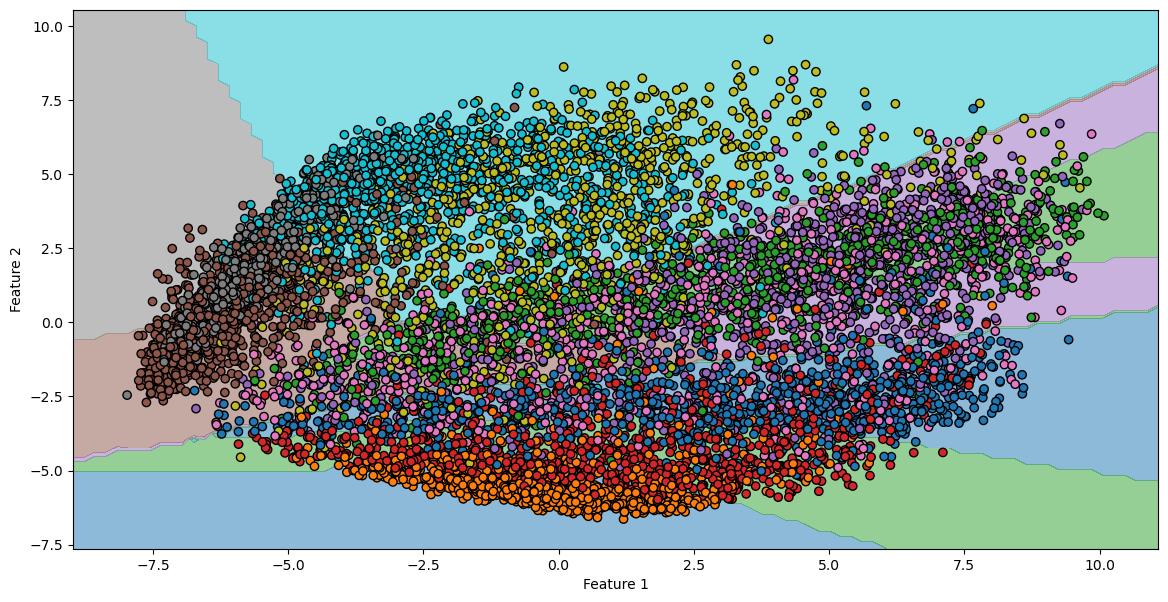

In [55]:
PCA_model = PCA(n_components=2)
reduced_x = PCA_model.fit_transform(X_train)
reduced_x_test = PCA_model.fit_transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=64,
                        activation='relu',
                        solver='sgd',
                        alpha=0,
                        learning_rate_init=0.001,
                        max_iter=200,
                        early_stopping=True,
                        shuffle=True)

clf.fit(reduced_x, Y_train)
fig, ax=plt.subplots(figsize=(14,7))
index0 = [i for i,val in enumerate(Y_test) if val==0]
index1 = [i for i,val in enumerate(Y_test) if val==1]
index2 = [i for i,val in enumerate(Y_test) if val==2]
index3 = [i for i,val in enumerate(Y_test) if val==3]
index4 = [i for i,val in enumerate(Y_test) if val==4]
index5 = [i for i,val in enumerate(Y_test) if val==5]
index6 = [i for i,val in enumerate(Y_test) if val==6]
index7 = [i for i,val in enumerate(Y_test) if val==7]
index8 = [i for i,val in enumerate(Y_test) if val==8]
index9 = [i for i,val in enumerate(Y_test) if val==9]

disp = DecisionBoundaryDisplay.from_estimator(
     clf, reduced_x_test, response_method="predict",
     xlabel="Feature 1", ylabel="Feature 2",
     alpha=0.5, ax=ax, cmap="tab10")
disp.ax_.scatter(reduced_x_test[:, 0], reduced_x_test[:, 1], c=Y_test, edgecolor="k", cmap="tab10")
plt.show()

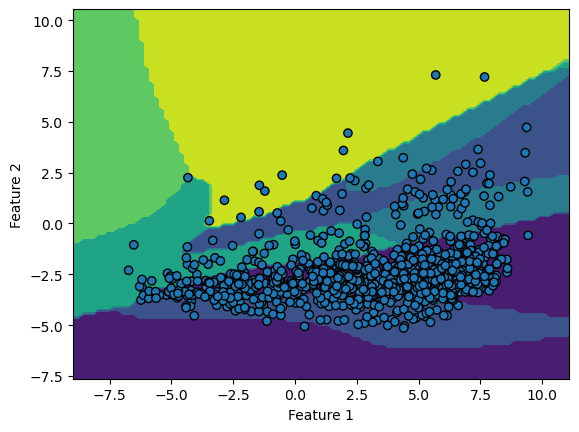

In [36]:
disp.plot()
disp.ax_.scatter(reduced_x_test[index0, 0], reduced_x_test[index0, 1], c=Y_test[index0], edgecolor="k", cmap="tab10")
plt.show()

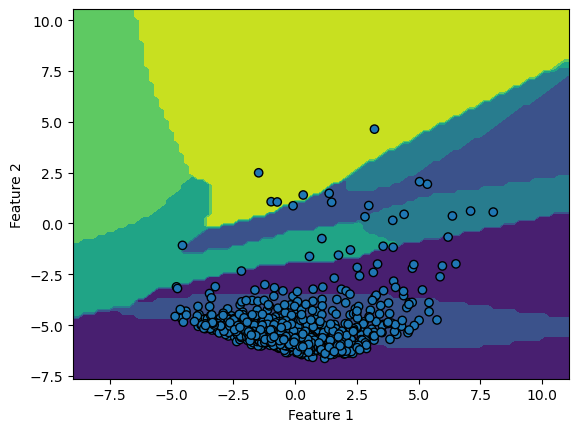

In [37]:
disp.plot()
disp.ax_.scatter(reduced_x_test[index1, 0], reduced_x_test[index1, 1], c=Y_test[index1], edgecolor="k", cmap="tab10")
plt.show()

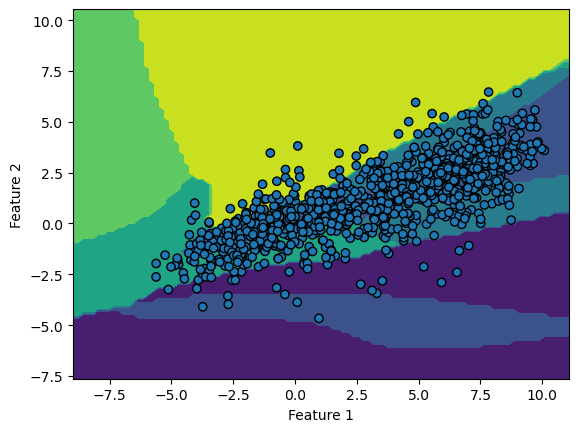

In [38]:
disp.plot()
disp.ax_.scatter(reduced_x_test[index2, 0], reduced_x_test[index2, 1], c=Y_test[index2], edgecolor="k", cmap="tab10")
plt.show()

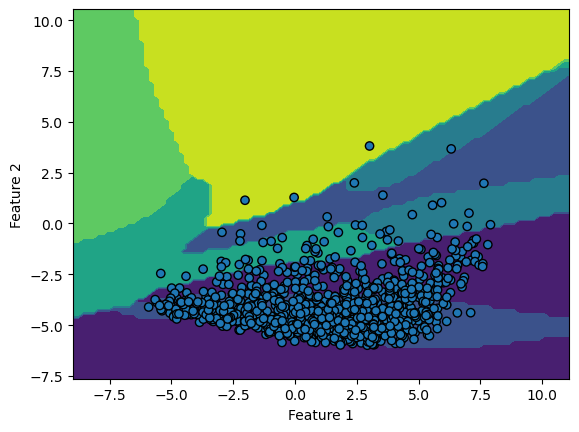

In [39]:
disp.plot()
disp.ax_.scatter(reduced_x_test[index3, 0], reduced_x_test[index3, 1], c=Y_test[index3], edgecolor="k", cmap="tab10")
plt.show()

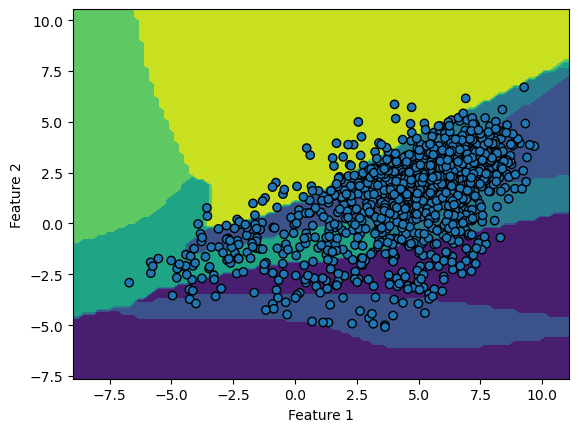

In [40]:
disp.plot()
disp.ax_.scatter(reduced_x_test[index4, 0], reduced_x_test[index4, 1], c=Y_test[index4], edgecolor="k", cmap="tab10")
plt.show()

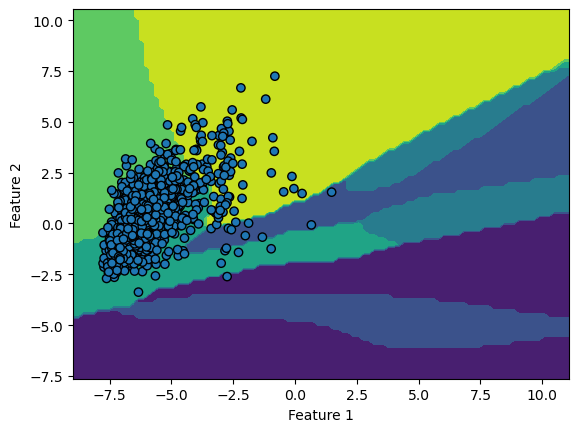

In [41]:
disp.plot()
disp.ax_.scatter(reduced_x_test[index5, 0], reduced_x_test[index5, 1], c=Y_test[index5], edgecolor="k", cmap="tab10")
plt.show()

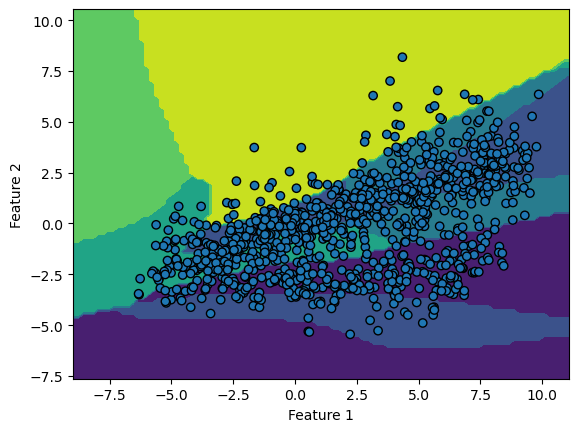

In [42]:
disp.plot()
disp.ax_.scatter(reduced_x_test[index6, 0], reduced_x_test[index6, 1], c=Y_test[index6], edgecolor="k", cmap="tab10")
plt.show()

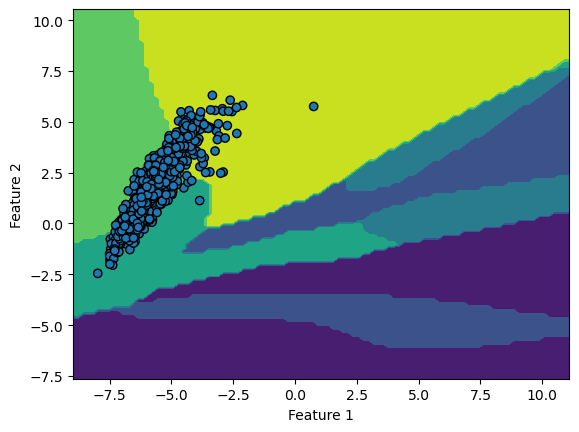

In [43]:
disp.plot()
disp.ax_.scatter(reduced_x_test[index7, 0], reduced_x_test[index7, 1], c=Y_test[index7], edgecolor="k", cmap="tab10")
plt.show()

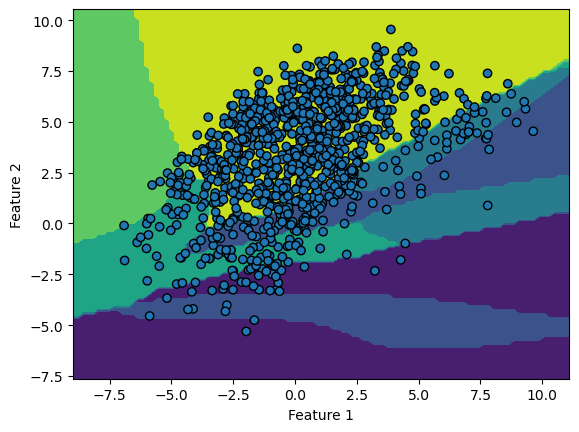

In [44]:
disp.plot()
disp.ax_.scatter(reduced_x_test[index8, 0], reduced_x_test[index8, 1], c=Y_test[index8], edgecolor="k", cmap="tab10")
plt.show()

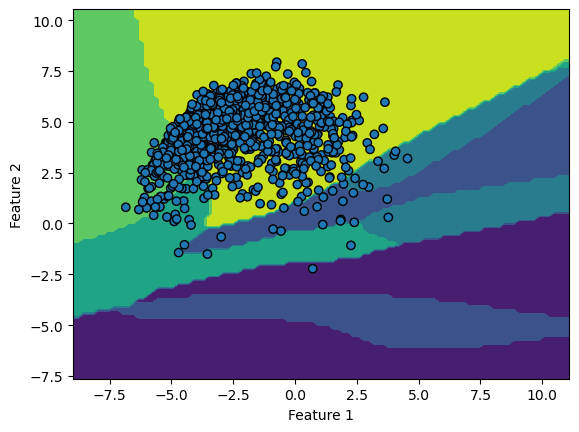

In [45]:
disp.plot()
disp.ax_.scatter(reduced_x_test[index9, 0], reduced_x_test[index9, 1], c=Y_test[index9], edgecolor="k", cmap="tab10")
plt.show()

In [16]:
hidden_layer_sizes = [2, 4, 8, 16, 32, 64, 128]
parameters = {'hidden_layer_sizes':hidden_layer_sizes}

nn = MLPClassifier(hidden_layer_sizes=64)

nn_clf = GridSearchCV(nn, parameters, scoring='accuracy', verbose=2, return_train_score=True)
nn_clf.fit(X_train, Y_train)
print('Best:',nn_clf.best_params_,'Score:', nn_clf.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=2; total time=  37.3s
[CV] END ...............................hidden_layer_sizes=2; total time=  28.7s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=2; total time=  36.4s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=2; total time=  40.2s
[CV] END ...............................hidden_layer_sizes=2; total time=  44.2s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=4; total time=  57.1s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=4; total time=  55.7s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=4; total time= 1.0min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=4; total time=  57.7s
[CV] END ...............................hidden_layer_sizes=4; total time=  51.6s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=8; total time=  47.9s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=8; total time= 1.1min
[CV] END ...............................hidden_layer_sizes=8; total time=  57.8s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=8; total time= 1.1min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...............................hidden_layer_sizes=8; total time= 1.0min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=16; total time= 1.3min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=16; total time= 1.4min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=16; total time= 1.3min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=16; total time= 1.3min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=16; total time= 1.2min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=32; total time= 1.7min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=32; total time= 3.3min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=32; total time= 2.0min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=32; total time= 1.9min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=32; total time= 2.3min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=64; total time= 2.4min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=64; total time= 2.7min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=64; total time= 2.3min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=64; total time= 2.5min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..............................hidden_layer_sizes=64; total time= 2.3min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .............................hidden_layer_sizes=128; total time= 3.7min
[CV] END .............................hidden_layer_sizes=128; total time= 3.9min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .............................hidden_layer_sizes=128; total time= 4.1min
[CV] END .............................hidden_layer_sizes=128; total time= 3.0min
[CV] END .............................hidden_layer_sizes=128; total time= 2.3min
Best: {'hidden_layer_sizes': 128} Score: 0.8853


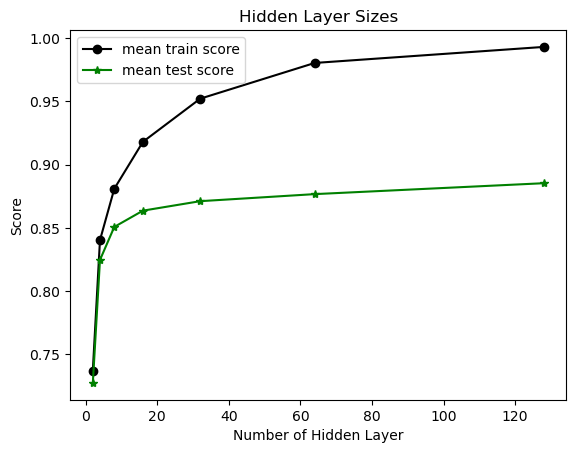

In [17]:
plt.plot(hidden_layer_sizes, nn_clf.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(hidden_layer_sizes, nn_clf.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Number of Hidden Layer")
plt.ylabel("Score")
plt.title("Hidden Layer Sizes")
plt.legend()
plt.show()

In [18]:
activation = ["identity", "logistic", "tanh", "relu"]
parameters = {'activation':activation}

nn = MLPClassifier(hidden_layer_sizes=64)

nn_clf1 = GridSearchCV(nn, parameters, scoring='accuracy', verbose=2, return_train_score=True)
nn_clf1.fit(X_train, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ................................activation=identity; total time= 1.5min
[CV] END ................................activation=identity; total time= 1.6min
[CV] END ................................activation=identity; total time= 1.5min
[CV] END ................................activation=identity; total time= 2.0min
[CV] END ................................activation=identity; total time= 2.1min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ................................activation=logistic; total time= 2.9min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ................................activation=logistic; total time= 2.8min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ................................activation=logistic; total time= 2.9min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ................................activation=logistic; total time= 2.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ................................activation=logistic; total time= 2.3min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ....................................activation=tanh; total time= 2.7min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ....................................activation=tanh; total time= 2.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ....................................activation=tanh; total time= 2.4min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ....................................activation=tanh; total time= 2.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ....................................activation=tanh; total time= 2.5min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ....................................activation=relu; total time= 2.3min
[CV] END ....................................activation=relu; total time= 2.2min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ....................................activation=relu; total time= 2.4min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ....................................activation=relu; total time= 2.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ....................................activation=relu; total time= 2.3min
Best: {'hidden_layer_sizes': 128} Score: 0.8853


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


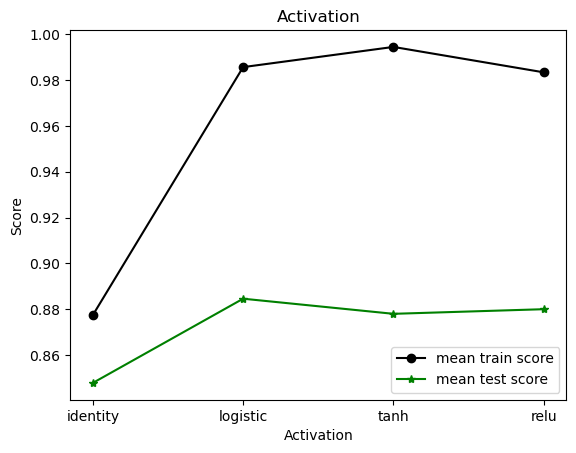

In [20]:
print('Best:',nn_clf1.best_params_,'Score:', nn_clf1.best_score_)
plt.plot(activation, nn_clf1.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(activation, nn_clf1.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Activation")
plt.ylabel("Score")
plt.title("Activation")
plt.legend()
plt.show()

In [21]:
max_iter = [5, 20, 50, 100, 150, 200, 250, 300, 400, 500]
parameters = {'max_iter':max_iter}

nn = MLPClassifier(hidden_layer_sizes=64)

nn_clf2 = GridSearchCV(nn, parameters, scoring='accuracy', verbose=2, return_train_score=True, cv=2)
nn_clf2.fit(X_train, Y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .........................................max_iter=5; total time=   2.3s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .........................................max_iter=5; total time=   2.4s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................................max_iter=20; total time=   9.2s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................................max_iter=20; total time=   8.3s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................................max_iter=50; total time=  22.1s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................................max_iter=50; total time=  22.0s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................................max_iter=100; total time=  42.9s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................................max_iter=100; total time=  48.9s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................................max_iter=150; total time= 1.2min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................................max_iter=150; total time= 1.3min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................................max_iter=200; total time= 1.7min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................................max_iter=200; total time= 1.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................................max_iter=250; total time= 2.1min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................................max_iter=250; total time= 2.1min
[CV] END .......................................max_iter=300; total time= 2.1min
[CV] END .......................................max_iter=300; total time= 1.5min
[CV] END .......................................max_iter=400; total time= 2.2min
[CV] END .......................................max_iter=400; total time= 1.7min
[CV] END .......................................max_iter=500; total time= 1.8min
[CV] END .......................................max_iter=500; total time= 1.9min
Best: {'hidden_layer_sizes': 128} Score: 0.8853


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


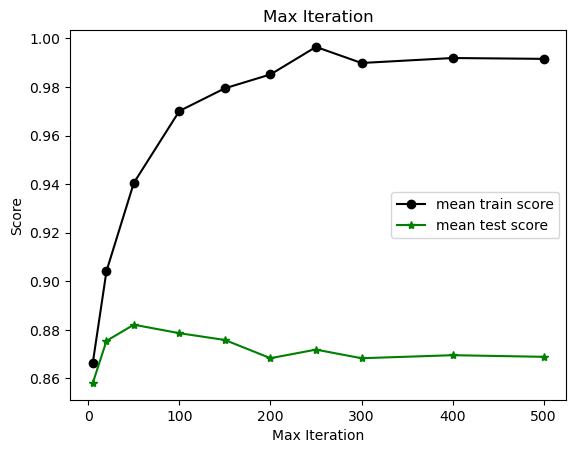

In [22]:
print('Best:',nn_clf2.best_params_,'Score:', nn_clf2.best_score_)
plt.plot(max_iter, nn_clf2.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(max_iter, nn_clf2.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Max Iteration")
plt.ylabel("Score")
plt.title("Max Iteration")
plt.legend()
plt.show()

In [23]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
parameters = {'alpha':alpha}

nn = MLPClassifier(hidden_layer_sizes=64)

nn_clf3 = GridSearchCV(nn, parameters, scoring='accuracy', verbose=2, return_train_score=True, cv=2)
nn_clf3.fit(X_train, Y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................................alpha=1e-05; total time= 2.4min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................................alpha=1e-05; total time= 2.5min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................................alpha=0.0001; total time= 1.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .......................................alpha=0.0001; total time= 1.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................................alpha=0.001; total time= 1.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ........................................alpha=0.001; total time= 1.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .........................................alpha=0.01; total time= 1.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END .........................................alpha=0.01; total time= 1.6min
[CV] END ..........................................alpha=0.1; total time= 1.3min
[CV] END ..........................................alpha=0.1; total time= 1.7min
[CV] END ............................................alpha=1; total time=  35.7s
[CV] END ............................................alpha=1; total time=  38.2s
Best: {'hidden_layer_sizes': 128} Score: 0.8853


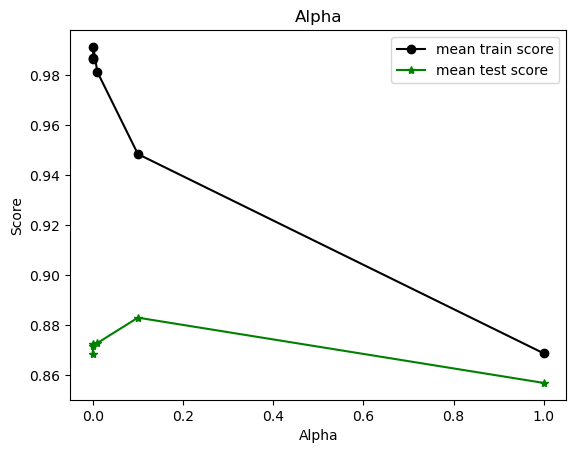

In [24]:
print('Best:',nn_clf3.best_params_,'Score:', nn_clf3.best_score_)
plt.plot(alpha, nn_clf3.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(alpha, nn_clf3.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.title("Alpha")
plt.legend()
plt.show()

In [27]:
learning_rate = [0.00001, 0.0001, 0.001, 0.01, 0.1] # 0.1
parameters = {'learning_rate_init':learning_rate}

nn = MLPClassifier(hidden_layer_sizes=64)

nn_clf4 = GridSearchCV(nn, parameters, scoring='accuracy', verbose=2, return_train_score=True, cv=2)
nn_clf4.fit(X_train, Y_train)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................learning_rate_init=1e-05; total time= 1.6min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................learning_rate_init=1e-05; total time= 1.8min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..........................learning_rate_init=0.0001; total time= 1.8min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..........................learning_rate_init=0.0001; total time= 1.7min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................learning_rate_init=0.001; total time= 1.8min


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................learning_rate_init=0.001; total time= 1.7min
[CV] END ............................learning_rate_init=0.01; total time=  57.7s
[CV] END ............................learning_rate_init=0.01; total time=  56.8s
[CV] END .............................learning_rate_init=0.1; total time=  16.0s
[CV] END .............................learning_rate_init=0.1; total time=  14.3s


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=2, estimator=MLPClassifier(hidden_layer_sizes=64),
             param_grid={'learning_rate_init': [1e-05, 0.0001, 0.001, 0.01,
                                                0.1]},
             return_train_score=True, scoring='accuracy', verbose=2)

Best: {'learning_rate_init': 0.0001} Score: 0.8779333333333333


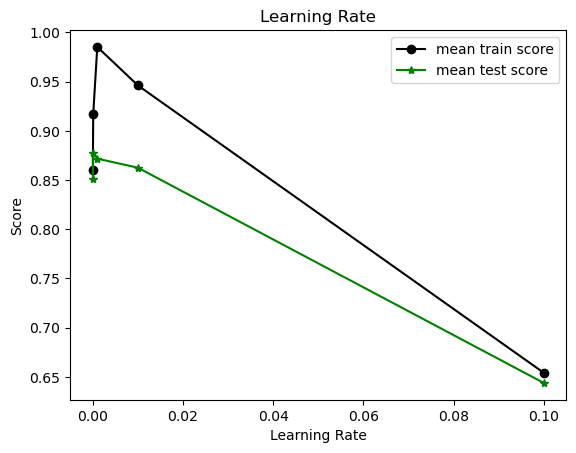

In [28]:
print('Best:',nn_clf4.best_params_,'Score:', nn_clf4.best_score_)
plt.plot(learning_rate, nn_clf4.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(learning_rate, nn_clf4.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.title("Learning Rate")
plt.legend()
plt.show()

## 2.2.2 Support Vector Machines

In [10]:
svm = SVC(kernel="linear", C=4)
svm.fit(X_train, Y_train)

SVC(C=4, kernel='linear')

In [13]:
svm_linear_training_accuracy = svm.score(X_train, Y_train)
svm_linear_test_accuracy = svm.score(X_test, Y_test)

In [14]:
print(f'SVM classifier train accuracy: {svm_linear_training_accuracy}')
print(f'SVM classifier test accuracy: {svm_linear_test_accuracy}')

SVM classifier train accuracy: 0.9079666666666667
SVM classifier test accuracy: 0.841


In [44]:
svm_RBF = SVC(kernel="rbf", C=4)
svm_RBF.fit(X_train, Y_train)

In [17]:
svm_rbf_training_accuracy = svm_RBF.score(X_train, Y_train)
svm_rbf_test_accuracy = svm_RBF.score(X_test, Y_test)

In [18]:
print(f'SVM classifier train accuracy: {svm_rbf_training_accuracy}')
print(f'SVM classifier test accuracy: {svm_rbf_test_accuracy}')

SVM classifier train accuracy: 0.9480666666666666
SVM classifier test accuracy: 0.8951


In [19]:
svm_Sigmoid = SVC(kernel="sigmoid", C=4)
svm_Sigmoid.fit(X_train, Y_train)

SVC(C=4, kernel='sigmoid')

In [20]:
svm_sigmoid_training_accuracy = svm_Sigmoid.score(X_train, Y_train)
svm_sigmoid_test_accuracy = svm_Sigmoid.score(X_test, Y_test)

In [21]:
print(f'SVM classifier train accuracy: {svm_sigmoid_training_accuracy}')
print(f'SVM classifier test accuracy: {svm_sigmoid_test_accuracy}')

SVM classifier train accuracy: 0.43943333333333334
SVM classifier test accuracy: 0.4362


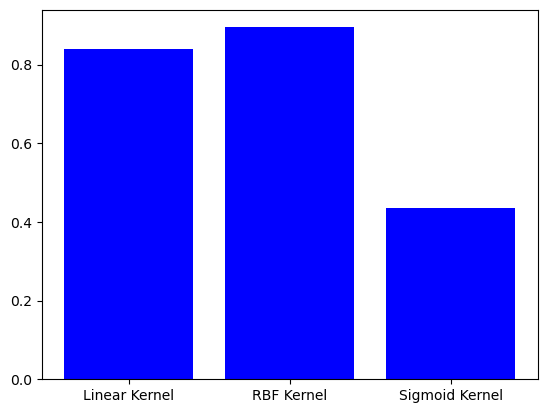

In [24]:
accurary = [svm_linear_test_accuracy, svm_rbf_test_accuracy, svm_sigmoid_test_accuracy]
name = ["Linear Kernel", "RBF Kernel", "Sigmoid Kernel"]
plt.bar(name, accurary, color = "blue")
plt.show()

In [7]:
# print(X_train.shape)
# print(Y_train.shape)
svm_RBF = SVC(kernel="rbf", C=4)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    svm_RBF,
    X_train[:30000],
    Y_train[:30000],
    scoring=None,
    cv=None,
    n_jobs=None,
    return_times=True)

In [8]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

Text(0, 0.5, 'Score')

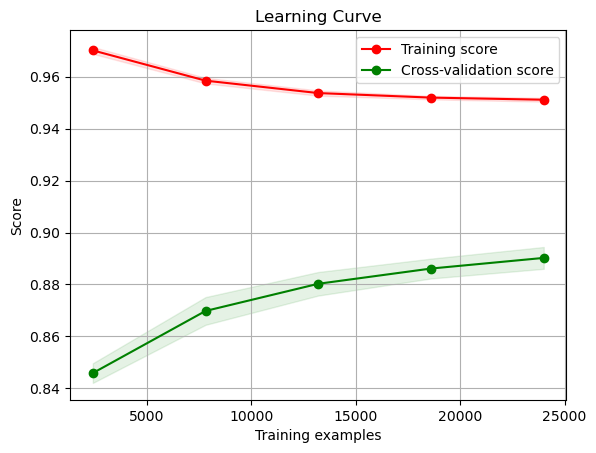

In [19]:
# plot learning curve
plt.grid()
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r")
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g", )
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

Text(0.5, 1.0, 'Scalability of the model')

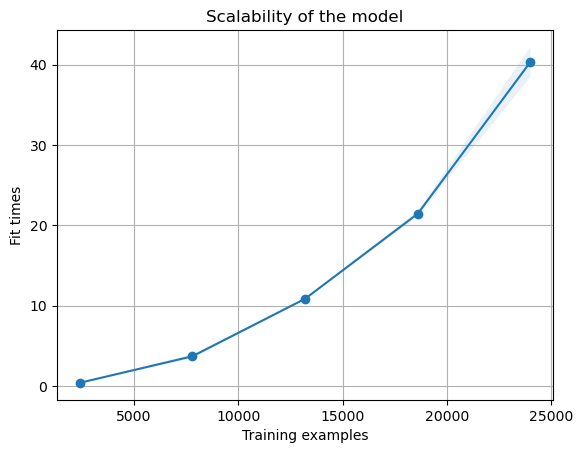

In [20]:
# Plot n_samples vs fit_times
plt.grid()
plt.plot(train_sizes, fit_times_mean, "o-")
plt.fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
plt.xlabel("Training examples")
plt.ylabel("Fit times")
plt.title("Scalability of the model")

In [ ]:
# Plot fit_time vs score
fit_time_argsort = fit_times_mean.argsort()
fit_time_sorted = fit_times_mean[fit_time_argsort]
test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
test_scores_std_sorted = test_scores_std[fit_time_argsort]
plt.grid()
plt.plot(fit_time_sorted, test_scores_mean_sorted, "o-", label="SVM")
plt.xlabel("Fit times")
plt.ylabel("Score")
plt.legend()
plt.title("Performance of the model")

Text(0.5, 1.0, 'Performance of the model')

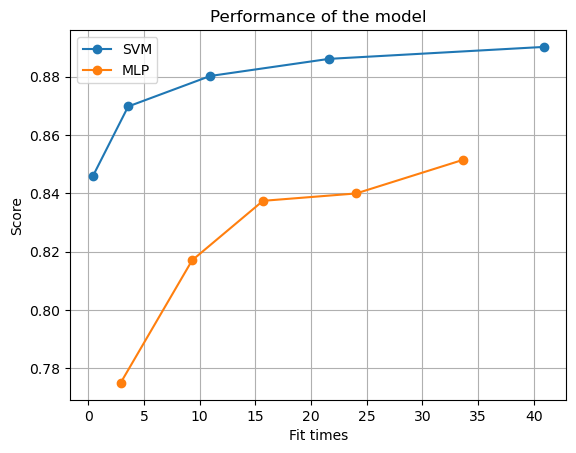

In [11]:
# Plot fit_time vs score
fit_time_argsort = fit_times_mean.argsort()
fit_time_sorted = fit_times_mean[fit_time_argsort]
test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
test_scores_std_sorted = test_scores_std[fit_time_argsort]
plt.grid()
plt.plot(fit_time_sorted, test_scores_mean_sorted, "o-", label="SVM")
plt.plot(fit_time_sorted_MLP, test_scores_mean_sorted_MLP, "o-", label="MLP")
plt.xlabel("Fit times")
plt.ylabel("Score")
plt.legend()
plt.title("Performance of the model")

Training accuracy:  0.95
Testing accuracy:  0.9


/Users/zhangkejia/miniforge3/envs/COMS30035_labs/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


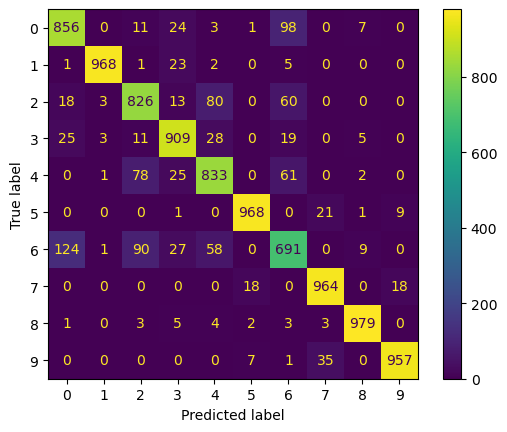

In [21]:
svm_RBF.fit(X_train, Y_train)
print('Training accuracy: ', round(svm_RBF.score(X_train, Y_train),2))
print('Testing accuracy: ', round(svm_RBF.score(X_test, Y_test),2))
plot_confusion_matrix(svm_RBF, X_test, Y_test)

In [23]:
y_pred = svm_RBF.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.89      0.91      0.90      1000
           4       0.83      0.83      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.69      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.89      0.90      0.89     10000
weighted avg       0.89      0.90      0.89     10000



In [19]:
PCA_model = PCA(n_components=2)
reduced_x = PCA_model.fit_transform(X_train)
reduced_x_test = PCA_model.fit_transform(X_test)

svm_RBF = SVC(kernel="rbf", C=4)
svm_RBF.fit(reduced_x, Y_train)


SVC(C=4)

In [ ]:
index = [i for i,val in enumerate(Y_test) if val==9]

In [ ]:
fig, ax=plt.subplots(figsize=(14,7))
disp = DecisionBoundaryDisplay.from_estimator(
     svm_RBF, reduced_x_test, response_method="predict",
     xlabel="Feature 1", ylabel="Feature 2",
     alpha=0.5, ax=ax)
disp.ax_.scatter(reduced_x_test[:, 0], reduced_x_test[:, 1], c=Y_test, edgecolor="k", cmap="tab10")
plt.show()

In [5]:
kernel = ["rbf", "linear", "sigmoid"]
parameters = {'kernel':kernel}

svm = SVC()

svm_cv = GridSearchCV(svm, parameters, scoring='accuracy', verbose=2, return_train_score=True, cv=2)
svm_cv.fit(X_train, Y_train)
print('Best:',svm_cv.best_params_,'Score:', svm_cv.best_score_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END .........................................kernel=rbf; total time= 2.9min
[CV] END .........................................kernel=rbf; total time= 2.9min
[CV] END ......................................kernel=linear; total time= 2.1min
[CV] END ......................................kernel=linear; total time= 2.1min
[CV] END .....................................kernel=sigmoid; total time= 4.1min
[CV] END .....................................kernel=sigmoid; total time= 4.7min
Best: {'kernel': 'rbf'} Score: 0.8823166666666666


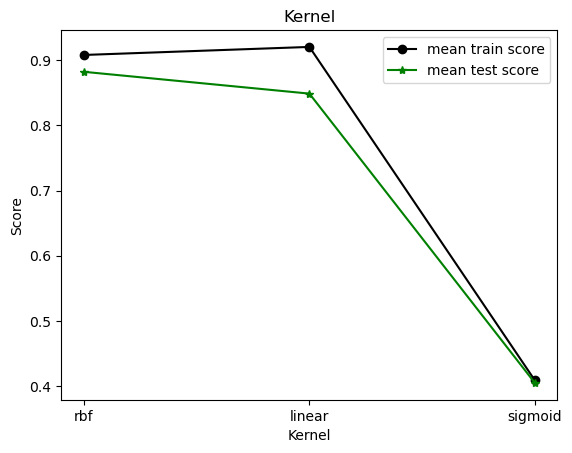

In [6]:
plt.plot(kernel, svm_cv.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(kernel, svm_cv.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("Kernel")
plt.ylabel("Score")
plt.title("Kernel")
plt.legend()
plt.show()

In [7]:
C = [0.25, 0.35, 0.45, 0.55, 1, 2, 3, 4]
parameters = {'C':C}

svm_RBF = SVC(kernel="rbf")

RBF = GridSearchCV(svm_RBF, parameters, scoring='accuracy', verbose=2, return_train_score=True, cv=2)
RBF.fit(X_train, Y_train)
print('Best:',RBF.best_params_,'Score:', RBF.best_score_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END .............................................C=0.25; total time= 3.5min
[CV] END .............................................C=0.25; total time= 3.6min
[CV] END .............................................C=0.35; total time= 3.5min
[CV] END .............................................C=0.35; total time= 3.4min
[CV] END .............................................C=0.45; total time= 3.2min
[CV] END .............................................C=0.45; total time= 3.2min
[CV] END .............................................C=0.55; total time= 3.1min
[CV] END .............................................C=0.55; total time= 3.1min
[CV] END ................................................C=1; total time= 2.9min
[CV] END ................................................C=1; total time= 2.9min
[CV] END ................................................C=2; total time= 2.7min
[CV] END ........................................

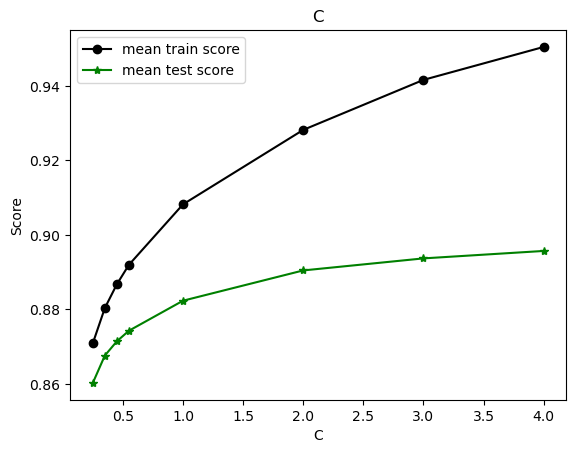

In [8]:
plt.plot(C, RBF.cv_results_['mean_train_score'],'ko-', label="mean train score")
plt.plot(C, RBF.cv_results_['mean_test_score'], 'g*-', label="mean test score")
plt.xlabel("C")
plt.ylabel("Score")
plt.title("C")
plt.legend()
plt.show()